# CPSC 4300/6300-001 Applied Data Science (Fall 2020)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Wenkang Wei"
COLLABORATORS = "Wenkang Wei"

# CPSC4300/6300-001 Problem Set #4

# Part C. Spam Email Classification

In this part, you will build a spam email classifier using several classification methods. For your convinience, we have downloaded a dataset from https://www.kaggle.com/venky73/spam-mails-dataset and put the csv file at https://www.palmetto.clemson.edu/dsci/datasets/kaggle/spam_ham_dataset.csv.

In [2]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")

## 1. Get the data

Read the spam dataset into a Pandas DataFrame and examine the data.

In [3]:
df = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/kaggle/spam_ham_dataset.csv", index_col=0)
df.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## 2. Examin the data

In [4]:
## Look at a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


In [5]:
## Get unique values of the label
np.unique(df['label'])

array(['ham', 'spam'], dtype=object)

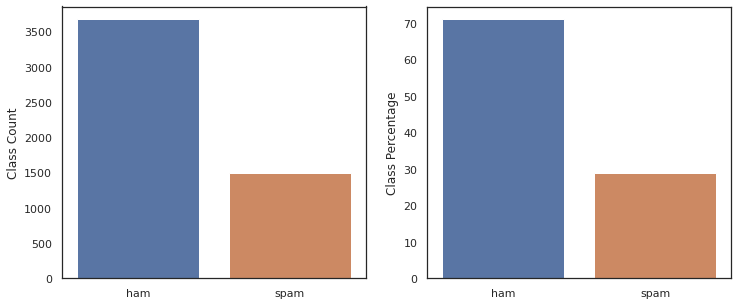

In [6]:
### Look at the class distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
class_counts = df['label'].value_counts()
class_percents = class_counts / np.sum(class_counts) * 100
_ = sns.barplot(x=class_counts.index, y=class_counts, ax = ax[0])
ax[0].set_ylabel('Class Count')
_ = sns.barplot(x=class_percents.index, y=class_percents, ax = ax[1])
ax[1].set_ylabel('Class Percentage')
plt.show()

In [7]:
## write a helper to print the data
def print_email(df, index):
    print(f'email {index}')
    for k, v in df.loc[0].items():
        print(f'\t{k} = {v}')

In [8]:
## Print email
print_email(df, 1)

email 1
	label = ham
	text = Subject: christmas tree farm pictures

	label_num = 0


## 3. Split the data into training set and test set

Use the function `sklearn.model_selection.train_test_split` to create a train set and a test set from the original data. The test set will contain 20% of the total samples. For repeatable results, set a value for the `random_state` parameter.

In [9]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 10)

In [10]:
## While it is not always necessary, as a good practice, you may look at some statistics of the train set and test set.

class_counts = pd.DataFrame({'Train Set': y_train.value_counts().sort_index(),
                           'Test Set': y_test.value_counts().sort_index()})
class_percents = class_counts / np.sum(class_counts)

class_counts.head(5)
class_percents.head(5)

,Train Set,Test Set
ham,0.708656,0.715942
spam,0.291344,0.284058


## 4. Preprocess the data using CountVectorizer (5 points)

Before feed the data into a machine learning algorithm, we need to convert the text to a ser of representative numerical values. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

To vectorizing this email data based on word count, you can construct a column representing each word using the class `sklearn.feature_extraction.text.CountVectorizer`. 

In [11]:
## Create a demo corpus
corpus = [df.loc[0].text, df.loc[2].text]
corpus

['Subject: christmas tree farm pictures\r\n',
 'Subject: calpine daily gas nomination\r\n- calpine daily gas nomination 1 . doc']

In [12]:
## Illustrate the concepts and use of CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect2 = CountVectorizer()
x2 = vect2.fit_transform(corpus)

print(vect2.vocabulary_ )
print(vect2.get_feature_names())
print(x2.toarray())

{'subject': 8, 'christmas': 1, 'tree': 9, 'farm': 4, 'pictures': 7, 'calpine': 0, 'daily': 2, 'gas': 5, 'nomination': 6, 'doc': 3}
['calpine', 'christmas', 'daily', 'doc', 'farm', 'gas', 'nomination', 'pictures', 'subject', 'tree']
[[0 1 0 0 1 0 0 1 1 1]
 [2 0 2 1 0 2 2 0 1 0]]


__Question 4.1__ Write some code in the folllowing cell to vectorize the train set data. Save the transformed results to a variable `X_train_tran`. (5 points)

In [13]:
# YOUR CODE HERE
# raise NotImplementedError()
X_train_tran = vect2.transform(X_train)
X_train_tran

<4136x10 sparse matrix of type '<class 'numpy.int64'>'
	with 5826 stored elements in Compressed Sparse Row format>

__Question 4.2__ What is the type and dimension of the `X_train_tran`? (2 points)

Write the type and dimension of the `X_train_tran`

## Answer to Q4.2:
type of X_train_tran is numpy array type with dtype =int64. The dimension of sample in X_train_tran = the number of unique words in the dictionary. Each element of the sample represents the counts of corresponding word in dictionary 

## 5. Train a model (5 points)

__Question 5.1__ Now build a classifier using `sklearn.ensemble.RandomForestClassifier` and train the model using the proprecessed data. Write some code to train the model. Save the model to a variable `forest_clf`.

In [14]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf = forest_clf.fit(X_train_tran, y_train)
forest_clf

RandomForestClassifier()

## 6. Evaluate the performances  of the model using the test set (5 points)

__Question 6.1__ Write some code in the following cell to evalue the model on the test set using `sklearn.metrics.accuracy_score`.

In [15]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
# raise NotImplementedError()
X_test_tran = vect2.transform(X_test)
y_pred = forest_clf.predict(X_test_tran)
acc = accuracy_score(y_pred, y_test)
print("Accuracy: ",acc)

Accuracy:  0.7178743961352657


## 7. Make predictions

In [16]:
message1 ="""Join Red Hat and Emergent at our upcoming, free Ansible Automation Technical Workshop in Greenville
on December 10.
Our most popular workshop, the Red Hat Ansible lab takes you through running ad-hoc commands in Core, 
writing and running a playbook, using more advanced features such as variables, loops, and handlers, and installing, configuring, and running job templates in Tower. The academic delivery model creates comfort and familiarity with this popular tool.
The hands-on workshop includes:
•	Exercise 1.1 - Ad-Hoc Commands
•	Exercise 1.2 - Writing Your First Playbook
•	Exercise 1.3 - Running Your First Playbook
•	Exercise 1.4 - Using Variables, loops, and handlers
•	Exercise 1.5 - Running the apache-basic-playbook
•	Exercise 1.6 - Roles: Making your playbooks reusable
•	Exercise 2.1 - Installing Ansible Tower
•	Exercise 2.2 - Configuring Ansible Tower
•	Exercise 2.3 - Creating and Running a Job Template
•	Resources, Wrap Up
To offer a quality lab experience, seating will be limited so reserve your spot today! 
"""

message2 = """𝚆𝚎𝚕𝚌𝚘𝚖𝚎 𝚝𝚘 𝙰 𝙰𝚋𝚜𝚘𝚕𝚞𝚝𝚎𝚕𝚢 𝙵𝚛𝚎𝚎 $𝟻𝟶 𝙰𝚖𝚊𝚣𝚘𝚗.𝚌𝚘𝚖® 𝙶𝚒𝚏𝚝 𝙲𝚊𝚛𝚍 (𝙻𝙰𝚂𝚃 𝙽𝙾𝚃𝙸𝙲𝙴: 𝟸𝟺 𝙷𝚘𝚞𝚛𝚜 𝙻𝚎𝚏𝚝 𝚝𝚘 𝙲𝚕𝚊𝚒𝚖) <http://en658kejf4nnmi.w0.wincvs5.tk/t/dq7wAALhxoQrfCQAAQnDFXQEAAADZtiiECCxIBAA/g/XQX> 

𝗗𝗲𝗮𝗿 𝗖𝘂𝘀𝘁𝗼𝗺𝗲𝗿, do you love online shopping at Amazon.com®... or hate it? Care to share your experience? Your opinion is worth $50 to us! 

You are one of 5 customers selected to participate in our 30-second anonymous survey, <http://en658kejf4nnmi.w0.wincvs5.tk/t/dq7wAALhxoQrfCQAAQnDFXQIAAADZtiiECCxIBAA/g/XQX>  today, November 4, 2019. 4 participants have already claimed their $50 reward. 𝗪𝗵𝗮𝘁 𝗮𝗯𝗼𝘂𝘁 𝘆𝗼𝘂? 

𝗚𝗲𝘁 𝗬𝗼𝘂𝗿 𝗙𝗥𝗘𝗘  
$𝟱𝟬 𝗔𝗺𝗮𝘇𝗼𝗻.𝗰𝗼𝗺® 
𝗚𝗶𝗳𝘁 𝗖𝗮𝗿𝗱* <http://en658kejf4nnmi.w0.wincvs5.tk/t/dq7wAALhxoQrfCQAAQnDFXQMAAADZtiiECCxIBAA/g/XQX> 

 <http://en658kejf4nnmi.w0.wincvs5.tk/t/dq7wAALhxoQrfCQAAQnDFXQQAAADZtiiECCxIBAA/g/XQX>

Hurry, your code AZ2019 expires in 24 hours! 
Confirm your survey participation status here: <http://en658kejf4nnmi.w0.wincvs5.tk/t/dq7wAALhxoQrfCQAAQnDFXQUAAADZtiiECCxIBAA/g/XQX> 

* Or receive other valuable rewards or discounts valued at or above $50.00 USD. Please answer survey questions honestly; your evaluation is anonymous and answers will not affect your rewards eligibility. Independent survey not affiliated with, or sponsored by, Amazon.com®, whose trademark and/or logo is property of its owner. This is an advertisement
"""

__Question 7.1__ Use the model you just trained, predict whether the above two messages are spam or ham. (5 points)

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
message = [message1, message2]
message_trans = vect2.transform(message)
message_pred = forest_clf.predict(message_trans)
message_pred

array(['ham', 'ham'], dtype=object)

__Question 7.2__ Write some code to print the probability of message1 in the above prediction.

In [18]:
# YOUR CODE HERE
# raise NotImplementedError()
message1_pred_proba = forest_clf.predict_proba(message_trans[0,:])
message1_pred_proba

array([[0.53614862, 0.46385138]])

## 8. Model Robustness

__Question 8.1__ Repeat step 4 through  step 6 for ten times. Print the accuracy score and the predictions of each model using the test data. After the loop, print the highest score and the lowest score of these models. (5 points)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(corpus)
X_test_tran = vect.transform(X_test)
X_train_tran = vect.transform(X_train)
message_tran = vect.transform([message1, message2])
np.random.seed(10)

def repeat_train_and_test(clf, n_repeats=10): 
    accuracy_scores = {}
    message1_pred = {}
    message2_pred = {}

# YOUR CODE HERE
# raise NotImplementedError()
    for i in range(n_repeats):
        model = clf.fit(X_train_tran, y_train)
        y_pred = model.predict(X_test_tran)
        message_pred = model.predict(message_tran)
        acc = accuracy_score(y_pred, y_test)
        accuracy_scores[i] = acc
        message1_pred[i] = message_pred[0]
        message2_pred[i] = message_pred[1]
    


    df_perf = pd.DataFrame({
            'accuracy' : accuracy_scores,
            'message1' : message1_pred,
            'message2' : message1_pred,
        })
    
    high_score = df_perf['accuracy'].max()
    low_score = df_perf['accuracy'].min()
    print(df_perf)
    print(f'highest score = {high_score}\nlowest score = {low_score}')
    
    return df_perf

forest_clf_model = RandomForestClassifier(n_estimators=50)
df_perf = repeat_train_and_test(forest_clf_model, 10)

   accuracy message1 message2
0  0.718841      ham      ham
1  0.717874      ham      ham
2  0.718841      ham      ham
3  0.718841      ham      ham
4  0.718841      ham      ham
5  0.717874      ham      ham
6  0.718841      ham      ham
7  0.718841      ham      ham
8  0.717874      ham      ham
9  0.717874      ham      ham
highest score = 0.7188405797101449
lowest score = 0.7178743961352657


__Question 8.2__ Based on teh above results, what would you recommend your customer to do when she want to make classification using some machine learning algorithms which the vendor claims an 95% accuracy? (5 points)

Write your response below:

## Answer to Q8.2: 
She can test those machine learning algorithm on some test data that models have not seen before and check if the 95% accuracy of the model makes sense or not in other test data. Since the model that the vendor claims 95% accuracy may be the accuracy on training set, not validation set or test set. On testing set, the machine learning algorithms could be less than the customer expects. 

Hence when the vendor claim an 95% accuracy, the customer is suggested to make sure if the machine learning model is robust or not, if the model has lower accuracy on other data. In the results above, we can see the accuracy of decision tree is aroun 0.71 after 10 times repeating testing, which is a robust model.

## 9. TFIDF model

Recall that raw word counts lead to features which put too much weights on words that appear too frequently. One approach to fix this issue is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a statistics of how often they appear in the documents. You can use the `sklearn.feature_extraction.text.TfidfVectorizer` to preprocee the data and then train and test a classification model. (5 points)

__Question 9.1__ Write some code below to transform the corpus using the TFIDF model, then train a RandomForestClassifier model and test the model in the same way as you did in Step 8.

In [20]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.feature_extraction.text import TfidfVectorizer
vect2 = TfidfVectorizer()
_ = vect2.fit_transform(corpus)
X_train_tran = vect2.transform(X_train)
X_test_tran = vect2.transform(X_test)
message_tran = vect2.transform([message1, message2])
forest_tdif_model = RandomForestClassifier(n_estimators=50)
repeat_train_and_test(forest_tdif_model, 10)

   accuracy message1 message2
0  0.717874      ham      ham
1  0.717874      ham      ham
2  0.718841      ham      ham
3  0.717874      ham      ham
4  0.718841      ham      ham
5  0.718841      ham      ham
6  0.717874      ham      ham
7  0.718841      ham      ham
8  0.719807      ham      ham
9  0.717874      ham      ham
highest score = 0.7198067632850241
lowest score = 0.7178743961352657


,accuracy,message1,message2
0,0.717874,ham,ham
1,0.717874,ham,ham
2,0.718841,ham,ham
3,0.717874,ham,ham
4,0.718841,ham,ham
5,0.718841,ham,ham
6,0.717874,ham,ham
7,0.718841,ham,ham
8,0.719807,ham,ham
9,0.717874,ham,ham


__Question 9.2__ Write down any thought or discovery that you may have based upon the above results. (5 points)

Write your thought or discovery.

## Answer to Q9.2：
In the results above, we can see that the random forest classifier is a robust model, since after repeating training and testing the model 10 times, the test accuracy of random forest classifier is still about 0.71, without significant changes. Additionally, the test accuracy of random forest using TF-IDF is similar to the test accuracy of random forest using count vectorizer.

## 10. Classification Using Naive Bayes

In the class, we have discussed that Naive Bayes is a great choice for text analysis. Now train a Naive Bayes model to classify the spam emails. You may use the `CountVectorizer` model to preprocess the data. For the Naive Bayes, you may use the class `sklearn.naive_bayes.MultinomialNB`.

__Question 10_1__ Write some code to train and test a Naive Bayes modelas what you did in Step 9. (5 poinst)

In [21]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
vect3 = CountVectorizer()
vect3.fit_transform(corpus)
X_train_tran = vect3.transform(X_train)
X_test_tran = vect3.transform(X_test)
message_tran = vect3.transform([message1, message2])
navive_bayes_model = MultinomialNB()
_ = repeat_train_and_test(navive_bayes_model, 10)


   accuracy message1 message2
0  0.682126      ham      ham
1  0.682126      ham      ham
2  0.682126      ham      ham
3  0.682126      ham      ham
4  0.682126      ham      ham
5  0.682126      ham      ham
6  0.682126      ham      ham
7  0.682126      ham      ham
8  0.682126      ham      ham
9  0.682126      ham      ham
highest score = 0.6821256038647343
lowest score = 0.6821256038647343


## 11. Classification Using SVM

__Question 11_1__ Write code to train a SVM classifier. (5 points)

In [22]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.svm import SVC

X_test_tran = vect3.transform(X_test)
message_tran = vect3.transform([message1, message2])
X_train_tran = vect3.transform(X_train)
svm_model  = SVC(kernel='rbf')
_ = repeat_train_and_test(svm_model, 10)


   accuracy message1 message2
0   0.71401      ham      ham
1   0.71401      ham      ham
2   0.71401      ham      ham
3   0.71401      ham      ham
4   0.71401      ham      ham
5   0.71401      ham      ham
6   0.71401      ham      ham
7   0.71401      ham      ham
8   0.71401      ham      ham
9   0.71401      ham      ham
highest score = 0.7140096618357488
lowest score = 0.7140096618357488


__Question 11_2__ Repeat Question 10_1 but now force the SVM classifier to use a linear kernel and set parameter C=2. (5 points)

In [23]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.svm import SVC

X_test_tran = vect3.transform(X_test)
message_tran = vect3.transform([message1, message2])

X_train_tran = vect3.transform(X_train)
linear_svm_model  = SVC(kernel = 'linear', C=2)
_ = repeat_train_and_test(linear_svm_model, 10)


   accuracy message1 message2
0  0.716908      ham      ham
1  0.716908      ham      ham
2  0.716908      ham      ham
3  0.716908      ham      ham
4  0.716908      ham      ham
5  0.716908      ham      ham
6  0.716908      ham      ham
7  0.716908      ham      ham
8  0.716908      ham      ham
9  0.716908      ham      ham
highest score = 0.7169082125603865
lowest score = 0.7169082125603865


__Question 11_3__ Based on the above results, do you think that a nonlinear kernel always performs better than a linear kernel? Justify your answer. (5 points)

1. Is a nonlinear kernel always performs better than a linear kernel?
2. Your justification:

## Answer to Q11.3：
1. nonlinear kernel is not always better than a linear kernel
2. This depends on the data distribution. if the distributions of features are not linear separable (data can not be separated by using a line), then non-linear kernel is preferred in this case. Otherwise, when data can be separated by a line, linear kernel may perform better than non-linear kernel

## 12. Classifiaction Using Logistic Regression

__Question 12_1__ Write some code to train a Logistic Regression classifier. You can setthe `max_iter` to 1000 so that the algorithm will converge without warning.(5 points)

In [24]:
# YOUR CODE HERE
# raise NotImplementedError()

from sklearn.linear_model import LogisticRegression
X_test_tran = vect3.transform(X_test)
X_train_tran = vect3.transform(X_train)
message_tran = vect3.transform([message1, message2])


logistic_model = LogisticRegression(max_iter = 1000)
_ = repeat_train_and_test(logistic_model, 10)


   accuracy message1 message2
0  0.716908     spam     spam
1  0.716908     spam     spam
2  0.716908     spam     spam
3  0.716908     spam     spam
4  0.716908     spam     spam
5  0.716908     spam     spam
6  0.716908     spam     spam
7  0.716908     spam     spam
8  0.716908     spam     spam
9  0.716908     spam     spam
highest score = 0.7169082125603865
lowest score = 0.7169082125603865


__Question 12_2__. Logistic Regression classifier comes with a probability estimation. Print the probability distributions for the predictions on the two messages. (5 points)

In [25]:
# YOUR CODE HERE
# raise NotImplementedError()
clf = logistic_model.fit(X_train_tran,y_train)
pred_prob = clf.predict_proba(message_tran)
pred_prob

array([[0.29556661, 0.70443339],
       [0.29556661, 0.70443339]])

## 13. Compare the Performance of Multiple Classifiers

__Question 13.1__ Complete the following code to compare the performance of the following classifier.

```
LogisticRegression
NaiveBayes
RandomForest
SVC-Rbf with rbf kernel
SVC-Linear with linear kernel
KNN
DecisionTree
```

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size = 0.2, random_state = 10)
 
models = {"LogisticRegression":LogisticRegression(max_iter = 1000),
            "MultinomialNB":MultinomialNB(),
            "RandomForestClassifier":RandomForestClassifier(),
            "SVC-rbf":SVC(kernel='rbf'),
            "SVC-linear":SVC(kernel='linear'),
            "KNN":KNeighborsClassifier(),
            "DecisionTree":DecisionTreeClassifier()}


CountVectorizer_accuracy = {}
TfidfVectorizer_accuracy = {}

# YOUR CODE HERE
# raise NotImplementedError()
count_vec = CountVectorizer()
X_train_tran_cnt = count_vec.fit_transform(X_train)
X_test_tran_cnt = count_vec.transform(X_test)

tfidf_vec = TfidfVectorizer()
X_train_tran_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tran_tfidf = tfidf_vec.transform(X_test)

for model_name in models.keys():
    # Using CountVector transformation
    clf = models[model_name]
    model = clf.fit(X_train_tran_cnt, y_train)
    y_test_pred = model.predict(X_test_tran_cnt)
    test_acc = accuracy_score(y_test_pred, y_test)
    CountVectorizer_accuracy[model_name] = test_acc
    
    # Using TFIDF Vector transformation
    clf = models[model_name]
    model = clf.fit(X_train_tran_tfidf, y_train)
    y_test_pred = model.predict(X_test_tran_tfidf)
    test_acc = accuracy_score(y_test_pred, y_test)
    TfidfVectorizer_accuracy[model_name] = test_acc



In [35]:
df_perf = pd.DataFrame({'CountVectorizer': CountVectorizer_accuracy,
                       'TfidfVectorizer': TfidfVectorizer_accuracy})
df_perf

,CountVectorizer,TfidfVectorizer
LogisticRegression,0.979710,0.981643
MultinomialNB,0.972947,0.879227
RandomForestClassifier,0.967150,0.973913
SVC-rbf,0.957488,0.985507
SVC-linear,0.966184,0.989372
KNN,0.863768,0.959420
DecisionTree,0.946860,0.942995


## 14.  SMS Message Classification

Using the same method, you can classify other dataset encoded in other language.

In [27]:
df = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/kaggle/spam.csv", encoding='latin-1')

In [28]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

print(df.shape)
df.head()

(5572, 5)


,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


__Question 14.1__ Complete the following code to test the performance of the following classifers. (5 points)

```
LogisticRegression
NaiveBayes
RandomForest
SVC-Rbf with rbf kernel
SVC-Linear with linear kernel
KNN
DecisionTree
```

In [29]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size = 0.2, random_state = 10)
 
models = {}
CountVectorizer_accuracy = {}
TfidfVectorizer_accuracy = {}

# YOUR CODE HERE
# raise NotImplementedError()

models = {"LogisticRegression":LogisticRegression(max_iter = 1000),
            "MultinomialNB":MultinomialNB(),
            "RandomForestClassifier":RandomForestClassifier(),
            "SVC-rbf":SVC(kernel='rbf'),
            "SVC-linear":SVC(kernel='linear'),
            "KNN":KNeighborsClassifier(),
            "DecisionTree":DecisionTreeClassifier()}


count_vec = CountVectorizer()
X_train_tran_cnt = count_vec.fit_transform(X_train)
X_test_tran_cnt = count_vec.transform(X_test)

tfidf_vec = TfidfVectorizer()
X_train_tran_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tran_tfidf = tfidf_vec.transform(X_test)

for model_name in models.keys():
    # Using CountVector transformation
    clf = models[model_name]
    model = clf.fit(X_train_tran_cnt, y_train)
    y_test_pred = model.predict(X_test_tran_cnt)
    test_acc = accuracy_score(y_test_pred, y_test)
    CountVectorizer_accuracy[model_name] = test_acc
    
    # Using TFIDF Vector transformation
    clf = models[model_name]
    model = clf.fit(X_train_tran_tfidf, y_train)
    y_test_pred = model.predict(X_test_tran_tfidf)
    test_acc = accuracy_score(y_test_pred, y_test)
    TfidfVectorizer_accuracy[model_name] = test_acc




In [30]:
df_perf = pd.DataFrame({'CountVectorizer': CountVectorizer_accuracy,
                       'TfidfVectorizer': TfidfVectorizer_accuracy})
df_perf

,CountVectorizer,TfidfVectorizer
LogisticRegression,0.978475,0.966816
MultinomialNB,0.988341,0.959641
RandomForestClassifier,0.971300,0.971300
SVC-rbf,0.977578,0.978475
SVC-linear,0.983857,0.985650
KNN,0.912108,0.904036
DecisionTree,0.966816,0.960538


__Question 14.2__ Write any observation you may have in the above results. (5 points)

Write your observation and/or findings.

## Answer to Q14.2:
From the test accuracy performances from different models above, we can see all models perform very well with test accuracy above 90% when using both count verctorizer and TFIDF. The best model is Multinomial Naive Bayesian model using Count Vectorizer, which has 0.98834 test accuracy. Moreover, Compared with TFIDF, Multinomial Naive Bayesian model improves test accuracy by 0.03, from 0.959 to 0.988,  after using Count Vectorizer.

In addition, the second best model is SVC-linear kernel with TFIDF Vectorizer. Using linear kernel in SVM is better than using rbf kernel in this dataset. The worst model is KNN with TFIDF with 0.90 test accuracy.

Overall, it seems like using Count Vectorizer is better than TFIDF vectorizer in this dataset as most of models improve the test accuracy after using Count Vectorizer

## 15. Multiclass Classification

Now applying the set of classifers that you have used to a multiclass classification problem. The dataset you will use is the tweets about airline services.

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [32]:
df = pd.read_csv("https://www.palmetto.clemson.edu/dsci/datasets/kaggle/tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [34]:
np.unique(df['airline_sentiment'])

array(['negative', 'neutral', 'positive'], dtype=object)

In [35]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values

__Question 15.1__ Complete the following code to test the performance of the following classifers on the airline tweets data. (10 points)

```
LogisticRegression-ovr (multi_class='ovr')
LogisticRegression-multinomial (multi_class='multinomial')
NaiveBayes
RandomForest
SVC-Rbf with rbf kernel
SVC-Linear with linear kernel
KNN
DecisionTree
```

In [36]:
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size = 0.2, random_state = 10)

models = {}
TfidfVectorizer_accuracy = {}
CountVectorizer_accuracy = {}

# YOUR CODE HERE
# raise NotImplementedError()

# models used to train with CountVectorization
models_countVect = {"LogisticRegression-ovr":LogisticRegression(max_iter = 1000, multi_class ='ovr'),
          "LogisticRegression-multinomial":LogisticRegression(max_iter = 1000, multi_class ='multinomial'),
            "MultinomialNB":MultinomialNB(),
            "RandomForestClassifier":RandomForestClassifier(),
            "SVC-rbf":SVC(kernel='rbf'),
            "SVC-linear":SVC(kernel='linear'),
            "KNN":KNeighborsClassifier(),
            "DecisionTree":DecisionTreeClassifier()}
# models used to train with TFIDF
models_TfidfVect = {"LogisticRegression-ovr":LogisticRegression(max_iter = 1000, multi_class ='ovr'),
          "LogisticRegression-multinomial":LogisticRegression(max_iter = 1000, multi_class ='multinomial'),
            "MultinomialNB":MultinomialNB(),
            "RandomForestClassifier":RandomForestClassifier(),
            "SVC-rbf":SVC(kernel='rbf'),
            "SVC-linear":SVC(kernel='linear'),
            "KNN":KNeighborsClassifier(),
            "DecisionTree":DecisionTreeClassifier()}
# store models 
models['CountVect'] = models_countVect
models['TfidfVect'] = models_TfidfVect

count_vec = CountVectorizer()
X_train_tran_cnt = count_vec.fit_transform(X_train)
X_test_tran_cnt = count_vec.transform(X_test)

tfidf_vec = TfidfVectorizer()
X_train_tran_tfidf = tfidf_vec.fit_transform(X_train)
X_test_tran_tfidf = tfidf_vec.transform(X_test)

for model_name in models_TfidfVect.keys():
    # Using CountVector transformation
    clf = models_countVect[model_name]
    model = clf.fit(X_train_tran_cnt, y_train)
    models_countVect[model_name] = model
    y_test_pred = model.predict(X_test_tran_cnt)
    test_acc = accuracy_score(y_test_pred, y_test)
    CountVectorizer_accuracy[model_name] = test_acc
    
    # Using TFIDF Vector transformation
    clf = models_TfidfVect[model_name]
    model = clf.fit(X_train_tran_tfidf, y_train)
    models_TfidfVect[model_name] = model
    y_test_pred = model.predict(X_test_tran_tfidf)
    test_acc = accuracy_score(y_test_pred, y_test)
    TfidfVectorizer_accuracy[model_name] = test_acc





In [37]:
df_perf = pd.DataFrame({'CountVectorizer': CountVectorizer_accuracy,
                       'TfidfVectorizer': TfidfVectorizer_accuracy})
df_perf

,CountVectorizer,TfidfVectorizer
LogisticRegression-ovr,0.799863,0.785519
LogisticRegression-multinomial,0.794057,0.790301
MultinomialNB,0.766052,0.650273
RandomForestClassifier,0.743169,0.737363
SVC-rbf,0.784153,0.788934
SVC-linear,0.773907,0.802937
KNN,0.511270,0.714139
DecisionTree,0.691940,0.651298


__Question 15.2__ Plot the confusion matrix of SVC-Linear. (5 points)

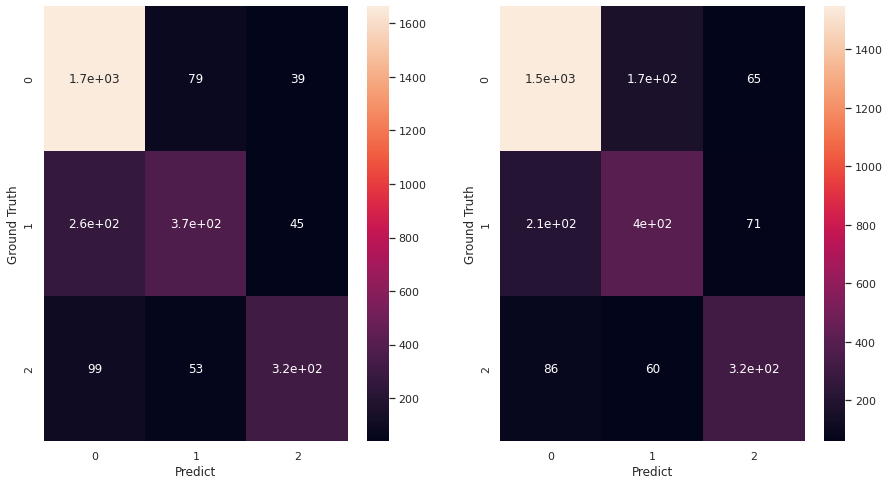

In [38]:
# YOUR CODE HERE
# raise NotImplementedError()
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2, figsize=(15,8))
y_pred_tfidf = models['TfidfVect']["SVC-linear"].predict(X_test_tran_tfidf)
cm1 = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm1, annot=True, ax= ax[0])
ax[0].set_xlabel('Predict')
ax[0].set_ylabel('Ground Truth')

y_pred_cnt = models['CountVect']["SVC-linear"].predict(X_test_tran_cnt)
cm2 = confusion_matrix(y_test, y_pred_cnt)
sns.heatmap(cm2, annot=True, ax= ax[1])
ax[1].set_xlabel('Predict')
ax[1].set_ylabel('Ground Truth')
plt.show()

__Question 15.3__ Print the true label, predicted label, and the predicted probabilities for the first five test samples using the `LogisticRegression-multinomial classifer` (5 points)

In [39]:
# YOUR CODE HERE
# raise NotImplementedError()
y_pred_cnt = models['CountVect']["LogisticRegression-multinomial"].predict(X_test_tran_cnt[:5])
prossibility_pred_cnt = models['CountVect']["LogisticRegression-multinomial"].predict_proba(X_test_tran_cnt[:5])
print("LogisticRegression-multinomial with Count Vectorization:")
print("True Labels: ",y_test[:5])
print("Predicted Labels: ",y_pred_cnt[:5])
print("Predicted Possibility: \n",prossibility_pred_cnt[:5])
print("\n\n")

y_pred_tfidf= models['TfidfVect']["LogisticRegression-multinomial"].predict(X_test_tran_tfidf[:5])
prossibility_pred_tfidf = models['TfidfVect']["LogisticRegression-multinomial"].predict_proba(X_test_tran_tfidf[:5])
print("LogisticRegression-multinomial with TFIDF Vectorization:")
print("True Labels: ",y_test[:5])
print("Predicted Labels: ",y_pred_tfidf[:5])
print("Predicted Possibility: \n",prossibility_pred_tfidf[:5])


LogisticRegression-multinomial with Count Vectorization:
True Labels:  ['neutral' 'neutral' 'negative' 'negative' 'negative']
Predicted Labels:  ['negative' 'positive' 'negative' 'negative' 'negative']
Predicted Possibility: 
 [[9.82983386e-01 1.68315820e-02 1.85032144e-04]
 [4.22046658e-01 6.75099588e-02 5.10443383e-01]
 [9.55185763e-01 1.35749324e-02 3.12393049e-02]
 [9.99893925e-01 7.29854353e-05 3.30900045e-05]
 [9.98708612e-01 9.04064198e-04 3.87323557e-04]]



LogisticRegression-multinomial with TFIDF Vectorization:
True Labels:  ['neutral' 'neutral' 'negative' 'negative' 'negative']
Predicted Labels:  ['negative' 'negative' 'negative' 'negative' 'negative']
Predicted Possibility: 
 [[0.97485069 0.02331257 0.00183674]
 [0.50287039 0.20553102 0.29159859]
 [0.72980551 0.10671377 0.16348073]
 [0.98012872 0.01237033 0.00750095]
 [0.9828267  0.01140501 0.00576829]]


__End of Part C__